<a href="https://colab.research.google.com/github/AndreNasci/ECO904/blob/main/Softex_Aula_11_Otimizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Função para Otimizar

In [ ]:
import tensorflow as tf
import math

var = tf.Variable(2.1)
cost = lambda: var ** 2 + 2
#cost = lambda: (var ** 2 - 10 * tf.math.cos(2 * math.pi * var)) + 20

Um otimizador tem como objetivo encontrar o mínimo global da função perda. Aqui veremos algumas modificações do gradiente descendente para encontrar esse mínimo.

O problema é que o GD (gradiente descendente) original tem problemas como gradientes locais. Por isso usamos as modificações.

Não há uma fórmula para otimizador. Ele depende do modelo a ser usado e do conjunto de dados. Contudo, todos eles usam GD, mas são modificações. 

## Otimizadores

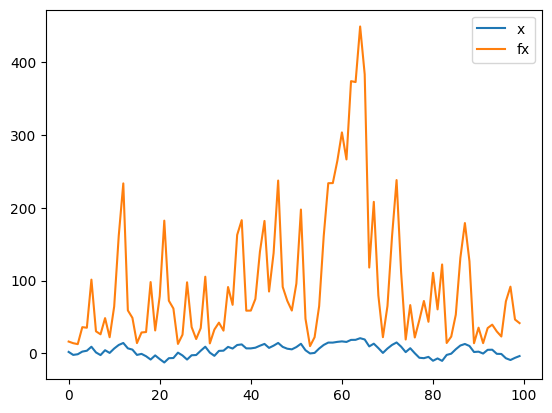

In [ ]:
import matplotlib.pyplot as plt

# Gradiente descendente estocástico (um chute direcionado)
# direcionar um chute = uma forma estocástica
# Passo do otimizador: step. Muito curto: leva muito tempo
# para encontrar o ponto ótimo. Muito grande: perigoso passar
# o ponto ótimo.
# SDG é muito sensível à taxa de aprendizagem
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
var = tf.Variable(2.1)

x=[]
y1=[]
y2=[]
for epoch in range(100):
    x.append(epoch)
    y1.append(var.numpy())
    y2.append(cost().numpy())
    opt.minimize(cost, var_list=[var])


plt.plot(x,y1,label='x')
plt.plot(x,y2,label='fx')
plt.legend()
g = plt.show()

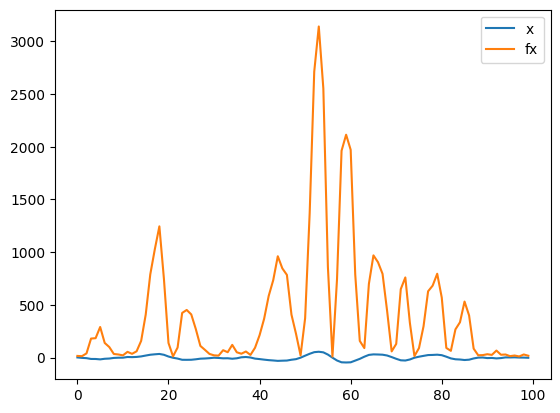

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# o momentum é semelhante a uma inercia. Se ele está indo em uma direção,
# ele tende a continuar, mesmo que o gradiente aponte para o outro lado
# isso ajuda a encontrar os minimos globais
# tudo precisa estar bem parametrizado
opt = tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.9)
var = tf.Variable(2.1)

x=[]
y1=[]
y2=[]
for epoch in range(100):
    x.append(epoch)
    y1.append(var.numpy())
    y2.append(cost().numpy())
    opt.minimize(cost, var_list=[var])


plt.plot(x,y1,label='x')
plt.plot(x,y2,label='fx')
plt.legend()
g = plt.show()

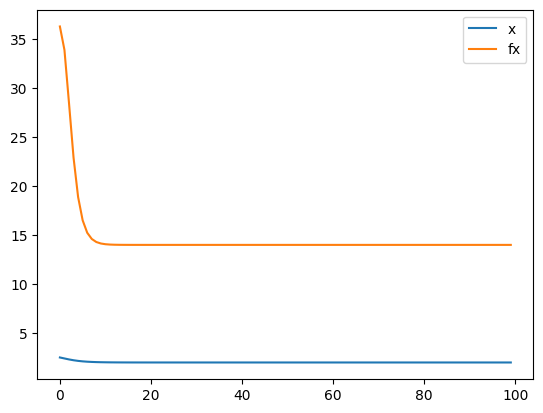

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# adagrad: gradiente adaptável/variável.
# contudo, não consegue funcionar bem como altas taxas de 
# variação. A busca fica mais lenta. 
# experimentar com 0.9 (como ele se adapata, pode-se usar
# taxas de aprendizado mais altas) 
opt = tf.keras.optimizers.Adagrad(learning_rate=0.1)
var = tf.Variable(2.5)

x=[]
y1=[]
y2=[]
for epoch in range(100):
    x.append(epoch)
    y1.append(var.numpy())
    y2.append(cost().numpy())
    opt.minimize(cost, var_list=[var])


plt.plot(x,y1,label='x')
plt.plot(x,y2,label='fx')
plt.legend()
g = plt.show()

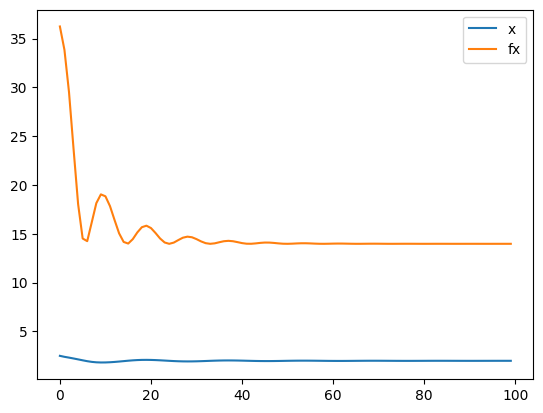

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# não possui artigos a respeito, publicado pela primeira vez em um site web
# tentar com 0.9
# ele possui momentum já incorporada
# 
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
var = tf.Variable(2.5)

x=[]
y1=[]
y2=[]
for epoch in range(100):
    x.append(epoch)
    y1.append(var.numpy())
    y2.append(cost().numpy())
    opt.minimize(cost, var_list=[var])


plt.plot(x,y1,label='x')
plt.plot(x,y2,label='fx')
plt.legend()
g = plt.show()

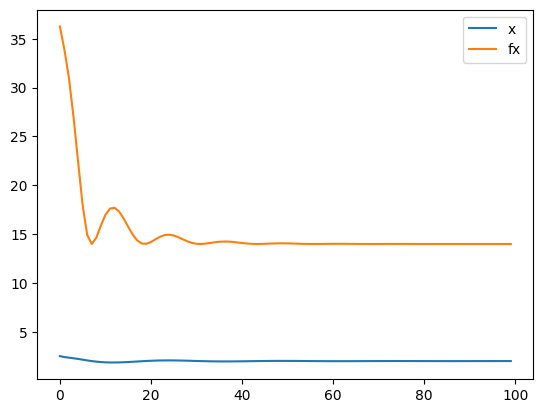

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 
opt = tf.keras.optimizers.Adamax(learning_rate=0.1)
var = tf.Variable(2.5)

x=[]
y1=[]
y2=[]
for epoch in range(100):
    x.append(epoch)
    y1.append(var.numpy())
    y2.append(cost().numpy())
    opt.minimize(cost, var_list=[var])


plt.plot(x,y1,label='x')
plt.plot(x,y2,label='fx')
plt.legend()
g = plt.show()

## Experimentais

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

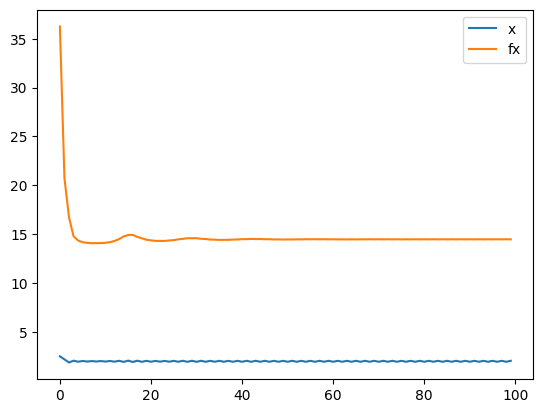

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# mistura entre adagrad e adam
# diminui o espaço de busca e aumenta a eficiencia do algoritmo 

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
var = tf.Variable(2.5)

x=[]
y1=[]
y2=[]
for epoch in range(100):
    x.append(epoch)
    y1.append(var.numpy())
    y2.append(cost().numpy())
    opt.minimize(cost, var_list=[var])


plt.plot(x,y1,label='x')
plt.plot(x,y2,label='fx')
plt.legend()
g = plt.show()

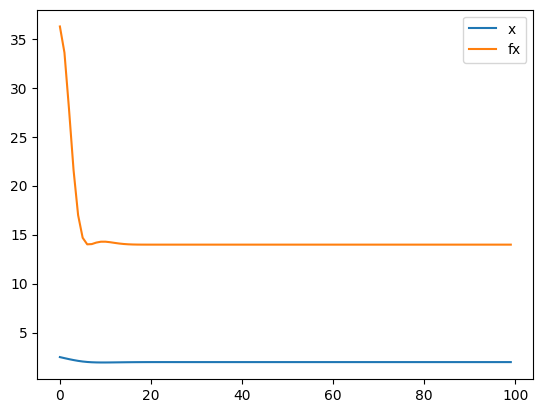

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

opt = tf.keras.optimizers.Nadam(learning_rate=0.1)
var = tf.Variable(2.5)

x=[]
y1=[]
y2=[]
for epoch in range(100):
    x.append(epoch)
    y1.append(var.numpy())
    y2.append(cost().numpy())
    opt.minimize(cost, var_list=[var])


plt.plot(x,y1,label='x')
plt.plot(x,y2,label='fx')
plt.legend()
g = plt.show()

# Exemplo Deep Learning

https://keras.io/examples/vision/oxford_pets_image_segmentation/

In [ ]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

--2023-05-11 17:57:38--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz [following]
--2023-05-11 17:57:38--  https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  29.9MB/s    in 27s     

2023-05-11 17:58:05 (28.3 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2023-05-11 17:58:05--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.

In [ ]:
import os

input_dir = "images/" # onde estão as imagens
target_dir = "annotations/trimaps/"
img_size = (160, 160)
num_classes = 3
batch_size = 32 # aqruivo de lote (32 imagens por lote de treinamento)

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 7390
images/Abyssinian_1.jpg | annotations/trimaps/Abyssinian_1.png
images/Abyssinian_10.jpg | annotations/trimaps/Abyssinian_10.png
images/Abyssinian_100.jpg | annotations/trimaps/Abyssinian_100.png
images/Abyssinian_101.jpg | annotations/trimaps/Abyssinian_101.png
images/Abyssinian_102.jpg | annotations/trimaps/Abyssinian_102.png
images/Abyssinian_103.jpg | annotations/trimaps/Abyssinian_103.png
images/Abyssinian_104.jpg | annotations/trimaps/Abyssinian_104.png
images/Abyssinian_105.jpg | annotations/trimaps/Abyssinian_105.png
images/Abyssinian_106.jpg | annotations/trimaps/Abyssinian_106.png
images/Abyssinian_107.jpg | annotations/trimaps/Abyssinian_107.png


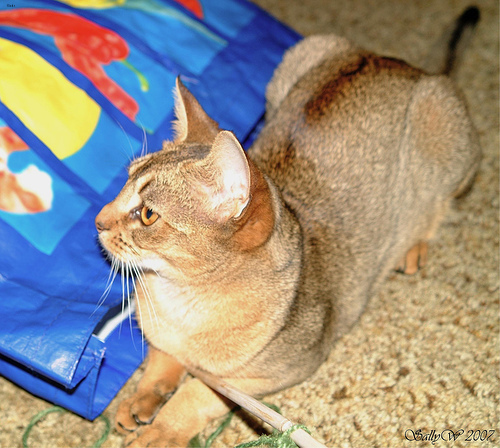

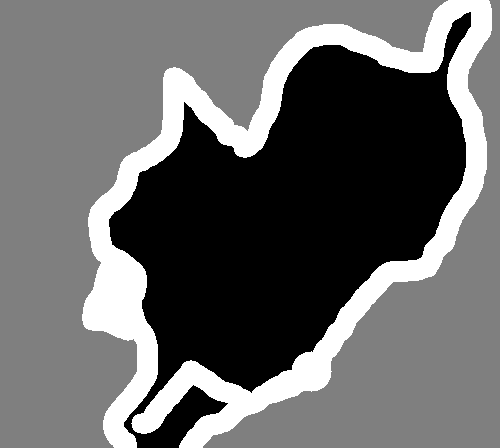

In [ ]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[9]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)

In [ ]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            y[j] -= 1
        return x, y

In [ ]:
from tensorflow.keras import layers


def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 80, 80, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 80, 80, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
import random

# Split our img paths into a training and a validation set
val_samples = 1000
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate data Sequences for each split
train_gen = OxfordPets(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [ ]:
import tensorflow as tf

# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
model = get_model(img_size, num_classes)
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy")

callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 15
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

Epoch 1/15
199/199 [==============================] - 126s 300ms/step - loss: 0.8199 - val_loss: 3.1458
Epoch 2/15
199/199 [==============================] - 60s 299ms/step - loss: 0.5229 - val_loss: 3.1491
Epoch 3/15
199/199 [==============================] - 67s 335ms/step - loss: 0.4569 - val_loss: 0.6742
Epoch 4/15
144/199 [====================>.........] - ETA: 15s - loss: 0.4212

KeyboardInterrupt: ignored

Resultados do RMSProp
```
Epoch 1/15
199/199 [==============================] - 74s 307ms/step - loss: 1.0416 - val_loss: 2.4489
Epoch 2/15
199/199 [==============================] - 60s 299ms/step - loss: 0.5124 - val_loss: 1.8434
Epoch 3/15
199/199 [==============================] - 60s 299ms/step - loss: 0.4347 - val_loss: 0.4188
Epoch 4/15
 20/199 [==>...........................] - ETA: 41s - loss: 0.3936
```

Adam
```
Epoch 1/15
199/199 [==============================] - 126s 300ms/step - loss: 0.8199 - val_loss: 3.1458
Epoch 2/15
199/199 [==============================] - 60s 299ms/step - loss: 0.5229 - val_loss: 3.1491
Epoch 3/15
199/199 [==============================] - 67s 335ms/step - loss: 0.4569 - val_loss: 0.6742
Epoch 4/15
144/199 [====================>.........] - ETA: 15s - loss: 0.4212
```

